In [18]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [19]:
tickers = ['PG', 'VZ', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [20]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6967 entries, 1995-01-03 to 2022-09-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6967 non-null   float64
 1   VZ      6967 non-null   float64
 2   F       6967 non-null   float64
 3   GE      6967 non-null   float64
dtypes: float64(4)
memory usage: 272.1 KB


In [21]:
mydata.head()

,PG,VZ,F,GE
Date,,,,
1995-01-03,7.875522,6.759040,4.264752,32.808647
1995-01-04,7.812392,6.716871,4.379500,32.808647
1995-01-05,7.701912,6.699866,4.341253,32.889046
1995-01-06,7.717697,6.665856,4.341253,32.728233
1995-01-09,7.686129,6.665856,4.417747,32.406570


In [22]:
mydata.tail()

,PG,VZ,F,GE
Date,,,,
2022-08-26,142.289993,43.250000,15.41,75.269997
2022-08-29,141.690002,43.330002,15.57,76.050003
2022-08-30,140.179993,42.529999,15.45,75.129997
2022-08-31,137.940002,41.810001,15.24,73.440002
2022-09-01,139.639999,41.810001,15.19,73.080002


In [23]:
#dados da primeira coluna da tabela
mydata.iloc[0]

PG     7.875522
VZ     6.759040
F      4.264752
GE    32.808647
Name: 1995-01-03 00:00:00, dtype: float64

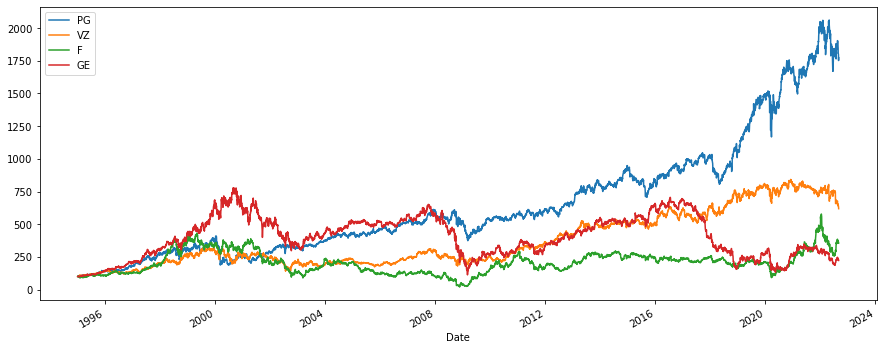

In [24]:
#normaliza os dados para base 100
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));
plt.show()

<AxesSubplot:xlabel='Date'>

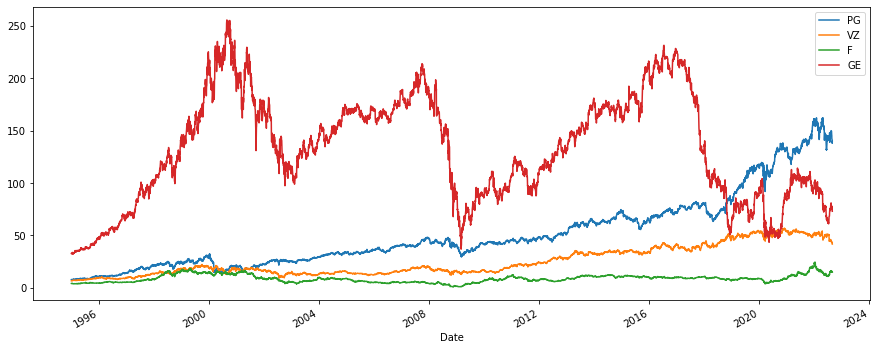

In [26]:
#sem normalizar os dados
mydata.plot(figsize=(15,6))

In [27]:
mydata.loc['1995-01-03']

PG     7.875522
VZ     6.759040
F      4.264752
GE    32.808647
Name: 1995-01-03 00:00:00, dtype: float64

In [29]:
mydata.iloc[0]

PG     7.875522
VZ     6.759040
F      4.264752
GE    32.808647
Name: 1995-01-03 00:00:00, dtype: float64

In [30]:
returns = (mydata/mydata.shift(1)) - 1
returns.head()

,PG,VZ,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,-0.006239,0.026906,0.000000
1995-01-05,-0.014142,-0.002532,-0.008733,0.002451
1995-01-06,0.002049,-0.005076,0.000000,-0.004890
1995-01-09,-0.004090,0.000000,0.017620,-0.009828


In [31]:
#definição de pessoas em uma matriz numpy
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [32]:
#multiplicação de matrizes
np.dot(returns, weights)

array([        nan,  0.00316279, -0.00573898, ..., -0.01223117,
       -0.01724877,  0.00103534])

In [33]:
annual_returns = returns.mean()*250
annual_returns

PG    0.128310
VZ    0.095536
F     0.126478
GE    0.080379
dtype: float64

In [34]:
np.dot(annual_returns, weights)

0.10767571728908326

In [35]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
pfolio_1

'10.768%'